## Import Libraries

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

## Get Paths to Data

In [2]:
data_path = Path('./processedBuildingLabels/data')
labels_path = Path(data_path/'labels')

band3_labels = Path(labels_path/'AOI_1_RIO_polygons_solution_3band.csv')
band8_labels = Path(labels_path/'AOI_1_RIO_polygons_solution_8band.csv')

band3_path = Path(data_path/'rasters_vectors/3band')
band8_path = Path(data_path/'rasters_vectors/8band')

geojson_path = Path(data_path/'rasters_vectors/geojson')


## Read csv files containing the labels

In [3]:
df = pd.read_csv(band3_labels)
df.head()

,ImageId,BuildingId,PolygonWKT_Pix,PolygonWKT_Geo
0,AOI_1_RIO_img5792,1,POLYGON ((408.210510077716208 39.5679995656149...,POLYGON ((-43.541791399999966 -22.876368899999...
1,AOI_1_RIO_img5792,2,POLYGON ((389.833864435032297 42.6174620222885...,POLYGON ((-43.541873799999962 -22.876382599999...
2,AOI_1_RIO_img5792,3,POLYGON ((242.119589264420313 -0.0000059554636...,POLYGON ((-43.542536143743767 -22.876191136973...
3,AOI_1_RIO_img5792,4,POLYGON ((311.733120444117787 216.147456877115...,"POLYGON ((-43.542224 -22.8771622 0,-43.5421641..."
4,AOI_1_RIO_img5792,5,POLYGON ((350.582776650603819 112.220886068182...,POLYGON ((-43.542049799999972 -22.876695299999...


WKT stands for well known text and is often used to describe polygons in string format. Shapely can be used to parse the string into a polygon.

In [4]:
polygon_string = df['PolygonWKT_Geo'].head()[0]
type(polygon_string)

str

### Parse Polygon Example

In [5]:
import shapely.wkt

In [6]:
P = shapely.wkt.loads(polygon_string)
type(P)

shapely.geometry.polygon.Polygon

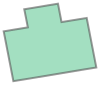

In [7]:
P

### Get the longitude and latitude bounds of your polygon

In [8]:
# (lon,lat,lon,lat)
P.bounds

(-43.541906, -22.87638549999997, -43.541771, -22.876272599999936)

## Create Map

In [9]:
import folium

In [10]:
lon = P.bounds[0]
lat = P.bounds[1]

In [11]:
map = folium.Map(
                location = [lat, lon], 
                zoom_start = 30)

## Add Polygons to Map

In order to easily add the polygons to our map, we can load them into a geopandas dataframe and convert the WKT polygons to shapely polygons by mapping them to the shapely.wkt.loads method demonstrated earlier.

In [12]:
import geopandas as gpd

In [13]:
gdf = gpd.read_file(band3_labels)
gdf.head()

,ImageId,BuildingId,PolygonWKT_Pix,PolygonWKT_Geo,geometry
0,AOI_1_RIO_img5792,1,POLYGON ((408.210510077716208 39.5679995656149...,POLYGON ((-43.541791399999966 -22.876368899999...,None
1,AOI_1_RIO_img5792,2,POLYGON ((389.833864435032297 42.6174620222885...,POLYGON ((-43.541873799999962 -22.876382599999...,None
2,AOI_1_RIO_img5792,3,POLYGON ((242.119589264420313 -0.0000059554636...,POLYGON ((-43.542536143743767 -22.876191136973...,None
3,AOI_1_RIO_img5792,4,POLYGON ((311.733120444117787 216.147456877115...,"POLYGON ((-43.542224 -22.8771622 0,-43.5421641...",None
4,AOI_1_RIO_img5792,5,POLYGON ((350.582776650603819 112.220886068182...,POLYGON ((-43.542049799999972 -22.876695299999...,None


In [14]:
gdf['geometry'] = gdf['PolygonWKT_Geo'].map(shapely.wkt.loads)
gdf.crs = 4326
gdf.head()

,ImageId,BuildingId,PolygonWKT_Pix,PolygonWKT_Geo,geometry
0,AOI_1_RIO_img5792,1,POLYGON ((408.210510077716208 39.5679995656149...,POLYGON ((-43.541791399999966 -22.876368899999...,"POLYGON Z ((-43.54179 -22.87637 0.00000, -43.5..."
1,AOI_1_RIO_img5792,2,POLYGON ((389.833864435032297 42.6174620222885...,POLYGON ((-43.541873799999962 -22.876382599999...,"POLYGON Z ((-43.54187 -22.87638 0.00000, -43.5..."
2,AOI_1_RIO_img5792,3,POLYGON ((242.119589264420313 -0.0000059554636...,POLYGON ((-43.542536143743767 -22.876191136973...,"POLYGON Z ((-43.54254 -22.87619 0.00000, -43.5..."
3,AOI_1_RIO_img5792,4,POLYGON ((311.733120444117787 216.147456877115...,"POLYGON ((-43.542224 -22.8771622 0,-43.5421641...","POLYGON Z ((-43.54222 -22.87716 0.00000, -43.5..."
4,AOI_1_RIO_img5792,5,POLYGON ((350.582776650603819 112.220886068182...,POLYGON ((-43.542049799999972 -22.876695299999...,"POLYGON Z ((-43.54205 -22.87670 0.00000, -43.5..."


### Retrieve All Polygons in Certain Image

In [15]:
image5792 = gdf.loc[gdf['ImageId']=='AOI_1_RIO_img5792','ImageId'].index

In [16]:
folium.GeoJson(data=gdf['geometry'][image5792]).add_to(map);

In [17]:
map